In [1]:
%matplotlib inline
import pyaf
import datetime

In [2]:

goog_link = 'https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_GOOG.csv'
    
import pandas as pd
goog_dataframe = pd.read_csv(goog_link);
goog_dataframe['Date'] = goog_dataframe['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
goog_dataframe.sort_values(by = 'Date' , ascending=True, inplace=True)
goog_dataframe.tail()

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
4,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
3,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
2,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002
0,0,GOOG,2016-07-27,741.770020,737.000000,1497100,738.280029,741.770020,744.460022


In [3]:
lDate =  goog_dataframe.Date


In [4]:
goog_dataframe.Date.min(), goog_dataframe.Date.max() 

(Timestamp('2011-07-28 00:00:00'), Timestamp('2016-07-27 00:00:00'))

In [5]:
lHierarchy = {};
lHierarchy['Levels'] = None;
lHierarchy['Data'] = None;
lHierarchy['Groups']= {};

lHierarchy['Periods']= ["D", "W" , "Q"]

lHierarchy['Type'] = "Temporal";

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


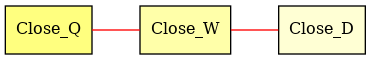

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 0.13601350784301758


In [6]:
# create a model to plot the hierarchy.
import pyaf.HierarchicalForecastEngine as hautof
lEngine = hautof.cHierarchicalForecastEngine()


lSignalHierarchy = lEngine.plot_Hierarchy(goog_dataframe , "Date", "Close", 1, 
                                          lHierarchy, None);

In [7]:
goog_dataframe.describe(include='all')

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
count,1258.000000,1258,1258,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
unique,NaN,1,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GOOG,2012-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1258,1,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2011-07-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,628.500000,NaN,NaN,696.285816,690.186479,3.605697e+06,696.447039,491.820009,702.078363
std,363.297628,NaN,NaN,168.831035,168.088283,2.526549e+06,168.945199,146.224491,169.631658
min,0.000000,NaN,NaN,490.920851,480.600832,7.900000e+03,490.030838,245.215210,495.978230
25%,314.250000,NaN,NaN,568.940062,563.376311,1.788850e+06,569.516381,347.184670,574.225972


In [8]:
# create a hierarchical model and train it
import pyaf.HierarchicalForecastEngine as hautof

lEngine = hautof.cHierarchicalForecastEngine()
lEngine.mOptions.mNbCores = 20
lDateColumn = "Date"
lSignalVar = "Close";

#
N = goog_dataframe.shape[0];
H = 4;
train_df = goog_dataframe


lSignalHierarchy = lEngine.train(train_df , lDateColumn, lSignalVar, 1, lHierarchy, None);

INFO:pyaf.std:START_HIERARCHICAL_TRAINING


      Unnamed: 0 Symbol       Date       Close         Low   Volume  \
1257        1257   GOOG 2011-07-28  610.941019  603.001016  6240000   
1256        1256   GOOG 2011-07-29  603.691033  603.691033  8305700   
1255        1255   GOOG 2011-08-01  606.771021  599.181019  7961800   
1254        1254   GOOG 2011-08-02  592.400990  591.570985  6425100   
1253        1253   GOOG 2011-08-03  601.171059  583.630982  7680000   

            Open   Adj_Close        High  
1257  605.191021  305.165344  615.981027  
1256  604.231014  301.543972  614.961042  
1255  611.221057  303.082428  615.501085  
1254  606.001054  295.904590  609.671015  
1253  594.271013  300.285244  603.001016  
      Unnamed: 0 Symbol       Date       Close         Low   Volume  \
1257        1257   GOOG 2011-07-28  610.941019  603.001016  6240000   
1256        1256   GOOG 2011-07-29  603.691033  603.691033  8305700   
1255        1255   GOOG 2011-08-01  606.771021  599.181019  7961800   
1254        1254   GOOG 2011-08

INFO:pyaf.hierarchical:TRAINING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_Q')]


0 Close_D      TH_D_start     Close_D
1257 2011-07-28  741.770020
1256 2011-07-29  738.419983
1255 2011-08-01  739.770020
1254 2011-08-02  742.739990
1253 2011-08-03  738.6300051 Close_W      TH_W_start      Close_W
1255 2011-08-01  2219.960023
1250 2011-08-08  3693.300048
1245 2011-08-15  3593.510010
1236 2011-08-22  3423.719971
1231 2011-08-29  3464.2000122 Close_Q      TH_Q_start       Close_Q
1240 2011-07-01  12999.690125
1176 2011-10-01  45972.050048
1051 2012-04-01  45924.609801
987  2012-07-01  39332.289919
924  2012-10-01  33779.431496




INFO:pyaf.std:START_TRAINING 'Close_W'
INFO:pyaf.std:START_TRAINING 'Close_D'
INFO:pyaf.std:START_TRAINING 'Close_Q'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_Q' 1.8149960041046143
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_W' 7.446824312210083
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_D' 9.318930387496948


      Unnamed: 0 Symbol       Date       Close         Low   Volume  \
1257        1257   GOOG 2011-07-28  610.941019  603.001016  6240000   
1256        1256   GOOG 2011-07-29  603.691033  603.691033  8305700   
1255        1255   GOOG 2011-08-01  606.771021  599.181019  7961800   
1254        1254   GOOG 2011-08-02  592.400990  591.570985  6425100   
1253        1253   GOOG 2011-08-03  601.171059  583.630982  7680000   

            Open   Adj_Close        High  TH_dayOfMonth  ... TH_weekOfQuarter  \
1257  605.191021  305.165344  615.981027             28  ...                4   
1256  604.231014  301.543972  614.961042             29  ...                4   
1255  611.221057  303.082428  615.501085              1  ...                5   
1254  606.001054  295.904590  609.671015              2  ...                5   
1253  594.271013  300.285244  603.001016              3  ...                5   

      TH_Q  TH_HalfYear  TH_Y  TH_D_start     Close_D  TH_W_start  \
1257     3       

INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_Q')]


0 Close_D      TH_D_start     Close_D
1257 2011-07-28  741.770020
1256 2011-07-29  738.419983
1255 2011-08-01  739.770020
1254 2011-08-02  742.739990
1253 2011-08-03  738.630005
1 Close_W      TH_W_start      Close_W
1255 2011-08-01  2219.960023
1250 2011-08-08  3693.300048
1245 2011-08-15  3593.510010
1236 2011-08-22  3423.719971
1231 2011-08-29  3464.200012
2 Close_Q      TH_Q_start       Close_Q
1240 2011-07-01  12999.690125
1176 2011-10-01  45972.050048
1051 2012-04-01  45924.609801
987  2012-07-01  39332.289919
924  2012-10-01  33779.431496


INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.046414852142333984
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.03556060791015625
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.11466360092163086
INFO:pyaf.std:STRUCTURE [0, 1, 2]
INFO:pyaf.std:DATASET_COLUMNS Index(['Date', 'TH_D_start', 'Close_D', 'Close_D_Forecast', 'TH_W_start',
       'Close_W', 'Close_W_Forecast', 'TH_Q_start', 'Close_Q',
       'Close_Q_Forecast', 'Close_D_BU_Forecast', 'Close_W_BU_Forecast',
       'Close_Q_BU_Forecast'],
      dtype='object')
INFO:pyaf.std:STRUCTURE_LEVEL (0, ['Close_D'])
INFO:pyaf.std:MODEL_LEVEL (0, ['Close_D'])
INFO:pyaf.std:STRUCTURE_LEVEL (1, ['Close_W'])
INFO:pyaf.std:MODEL_LEVEL (1, ['Close_W'])
INFO:pyaf.std:STRUCTURE_LEVEL (2, ['Close_Q'])
INFO:pyaf.std:MODEL_LEVEL (2, ['Close_Q'])
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_FIT_PERF ('Close_D_BU', 21.076653130392838, 0.0106, 21.076653130392838, 0.010

Index(['Date', 'TH_D_start', 'Close_D', 'Close_D_Forecast', 'TH_W_start',
       'Close_W', 'Close_W_Forecast', 'TH_Q_start', 'Close_Q',
       'Close_Q_Forecast'],
      dtype='object')
        Date TH_D_start     Close_D  Close_D_Forecast TH_W_start      Close_W  \
0 2011-07-28 2011-07-28  741.770020        741.770020        NaT     0.000000   
1 2011-07-29 2011-07-29  738.419983        741.770020        NaT     0.000000   
2 2011-08-01 2011-08-01  739.770020        738.419983 2011-08-01  2219.960023   
3 2011-08-02 2011-08-02  742.739990        739.770020        NaT     0.000000   
4 2011-08-03 2011-08-03  738.630005        742.739990        NaT     0.000000   
5 2011-08-04 2011-08-04  741.190002        738.630005        NaT     0.000000   
6 2011-08-05 2011-08-05  736.960022        741.190002        NaT     0.000000   
7 2011-08-08 2011-08-08  733.780029        736.960022 2011-08-08  3693.300048   
8 2011-08-09 2011-08-09  719.849976        733.780029        NaT     0.000000   
9 2

In [9]:
goog_dataframe

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High,TH_dayOfMonth,...,TH_weekOfQuarter,TH_Q,TH_HalfYear,TH_Y,TH_D_start,Close_D,TH_W_start,Close_W,TH_Q_start,Close_Q
1257,1257,GOOG,2011-07-28,610.941019,603.001016,6240000,605.191021,305.165344,615.981027,28,...,4,3,1,2011,2011-07-28,741.770020,2011-07-25,NaN,2011-07-01,NaN
1256,1256,GOOG,2011-07-29,603.691033,603.691033,8305700,604.231014,301.543972,614.961042,29,...,4,3,1,2011,2011-07-29,738.419983,2011-07-25,NaN,2011-07-01,NaN
1255,1255,GOOG,2011-08-01,606.771021,599.181019,7961800,611.221057,303.082428,615.501085,1,...,5,3,1,2011,2011-08-01,739.770020,2011-08-01,2219.960023,2011-07-01,NaN
1254,1254,GOOG,2011-08-02,592.400990,591.570985,6425100,606.001054,295.904590,609.671015,2,...,5,3,1,2011,2011-08-02,742.739990,2011-08-01,NaN,2011-07-01,NaN
1253,1253,GOOG,2011-08-03,601.171059,583.630982,7680000,594.271013,300.285244,603.001016,3,...,5,3,1,2011,2011-08-03,738.630005,2011-08-01,NaN,2011-07-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002,21,...,3,3,1,2016,2016-07-21,601.171059,2016-07-18,NaN,2016-07-01,NaN
3,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990,22,...,3,3,1,2016,2016-07-22,592.400990,2016-07-18,NaN,2016-07-01,NaN
2,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985,25,...,4,3,1,2016,2016-07-25,606.771021,2016-07-25,2956.905086,2016-07-01,NaN
1,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002,26,...,4,3,1,2016,2016-07-26,603.691033,2016-07-25,NaN,2016-07-01,NaN


In [10]:
list(goog_dataframe.columns)

['Unnamed: 0',
 'Symbol',
 'Date',
 'Close',
 'Low',
 'Volume',
 'Open',
 'Adj_Close',
 'High',
 'TH_dayOfMonth',
 'TH_dayname',
 'TH_D',
 'TH_M',
 'TH_W',
 'TH_weekOfQuarter',
 'TH_Q',
 'TH_HalfYear',
 'TH_Y',
 'TH_D_start',
 'Close_D',
 'TH_W_start',
 'Close_W',
 'TH_Q_start',
 'Close_Q']

In [12]:
WData = goog_dataframe.groupby(['TH_W_start'])['Close'].sum().reset_index()

In [13]:
goog_dataframe.groupby(['TH_Q_start'])['Close'].sum().reset_index()

,TH_Q_start,Close
0,2011-07-01,24974.602871
1,2011-10-01,37454.264185
2,2012-01-01,38225.765499
3,2012-04-01,37690.344660
4,2012-07-01,41402.691062
5,2012-10-01,43385.594157
6,2013-01-01,46710.629997
7,2013-04-01,54352.203301
8,2013-07-01,56788.167486
9,2013-10-01,64978.551325


In [15]:
goog_dataframe[['Date' , 'Close']].merge(WData, left_on='Date',right_on='TH_W_start', how='left')

,Date,Close_x,TH_W_start,Close_y
0,2011-07-28,610.941019,NaT,NaN
1,2011-07-29,603.691033,NaT,NaN
2,2011-08-01,606.771021,2011-08-01,2956.905086
3,2011-08-02,592.400990,NaT,NaN
4,2011-08-03,601.171059,NaT,NaN
...,...,...,...,...
1253,2016-07-21,738.630005,NaT,NaN
1254,2016-07-22,742.739990,NaT,NaN
1255,2016-07-25,739.770020,2016-07-25,2219.960023
1256,2016-07-26,738.419983,NaT,NaN


In [16]:
goog_dataframe.describe(include='all')

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High,TH_dayOfMonth,...,TH_weekOfQuarter,TH_Q,TH_HalfYear,TH_Y,TH_D_start,Close_D,TH_W_start,Close_W,TH_Q_start,Close_Q
count,1258.000000,1258,1258,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,...,1258.000000,1258.000000,1258.000000,1258.000000,1258,1258.000000,1258,237.000000,1258,12.000000
unique,NaN,1,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1258,NaN,262,NaN,21,NaN
top,NaN,GOOG,2012-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2012-02-14 00:00:00,NaN,2014-09-29 00:00:00,NaN,2014-07-01 00:00:00,NaN
freq,NaN,1258,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,5,NaN,64,NaN
first,NaN,NaN,2011-07-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2011-07-28 00:00:00,NaN,2011-07-25 00:00:00,NaN,2011-07-01 00:00:00,NaN
last,NaN,NaN,2016-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-07-27 00:00:00,NaN,2016-07-25 00:00:00,NaN,2016-07-01 00:00:00,NaN
mean,628.500000,NaN,NaN,696.285816,690.186479,3.605697e+06,696.447039,491.820009,702.078363,15.724165,...,6.019078,2.515103,1.009539,2013.569952,NaN,696.285816,NaN,3409.033258,NaN,41945.792961
std,363.297628,NaN,NaN,168.831035,168.088283,2.526549e+06,168.945199,146.224491,169.631658,8.734085,...,3.736076,1.113386,0.703376,1.498964,NaN,168.831035,NaN,843.977828,NaN,13445.635017
min,0.000000,NaN,NaN,490.920851,480.600832,7.900000e+03,490.030838,245.215210,495.978230,1.000000,...,0.000000,1.000000,0.000000,2011.000000,NaN,490.920851,NaN,2087.270081,NaN,12999.690125
25%,314.250000,NaN,NaN,568.940062,563.376311,1.788850e+06,569.516381,347.184670,574.225972,8.000000,...,3.000000,2.000000,1.000000,2012.000000,NaN,568.940062,NaN,2794.344764,NaN,34400.890682
